In [1]:
import requests
import pandas as pd
import numpy as np
import time
import scipy.stats as stats
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import FunctionTransformer, StandardScaler 
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn_pandas import DataFrameMapper

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 30]

In [2]:
def show(image):
    '''
    Function to plot the MNIST data
    '''
    plt.rcParams['figure.figsize'] = [5, 5]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=plt.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

def showNxN(images):
    '''
    Function to plot the MNIST data on a grid of NxN
    '''
    plt.rcParams['figure.figsize'] = [30, 30]
    
    number_of_images = images.shape[0]
    image_size = int(np.sqrt(images.shape[1]))
    
    images_x = int(np.sqrt(number_of_images))
    images_y = images_x
    
    fig = plt.figure()
    
    for i in range(0, number_of_images):
        ax = fig.add_subplot(images_x, images_y, i+1)
        imgplot = ax.imshow(images[i,:].reshape(image_size, image_size), cmap=plt.cm.Greys, interpolation = 'nearest')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show();

In [3]:
fashion_df = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
xFashion = pd.DataFrame(fashion_df.iloc[:,1:]/255)
yFashion = pd.DataFrame(fashion_df.iloc[:,0])

In [53]:
fashion_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


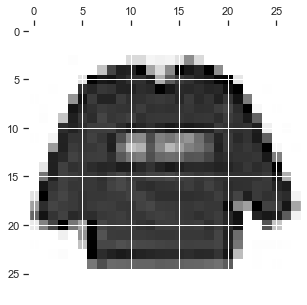

In [4]:
show(np.array(fashion_df.iloc[0,1:]).reshape(28, 28))

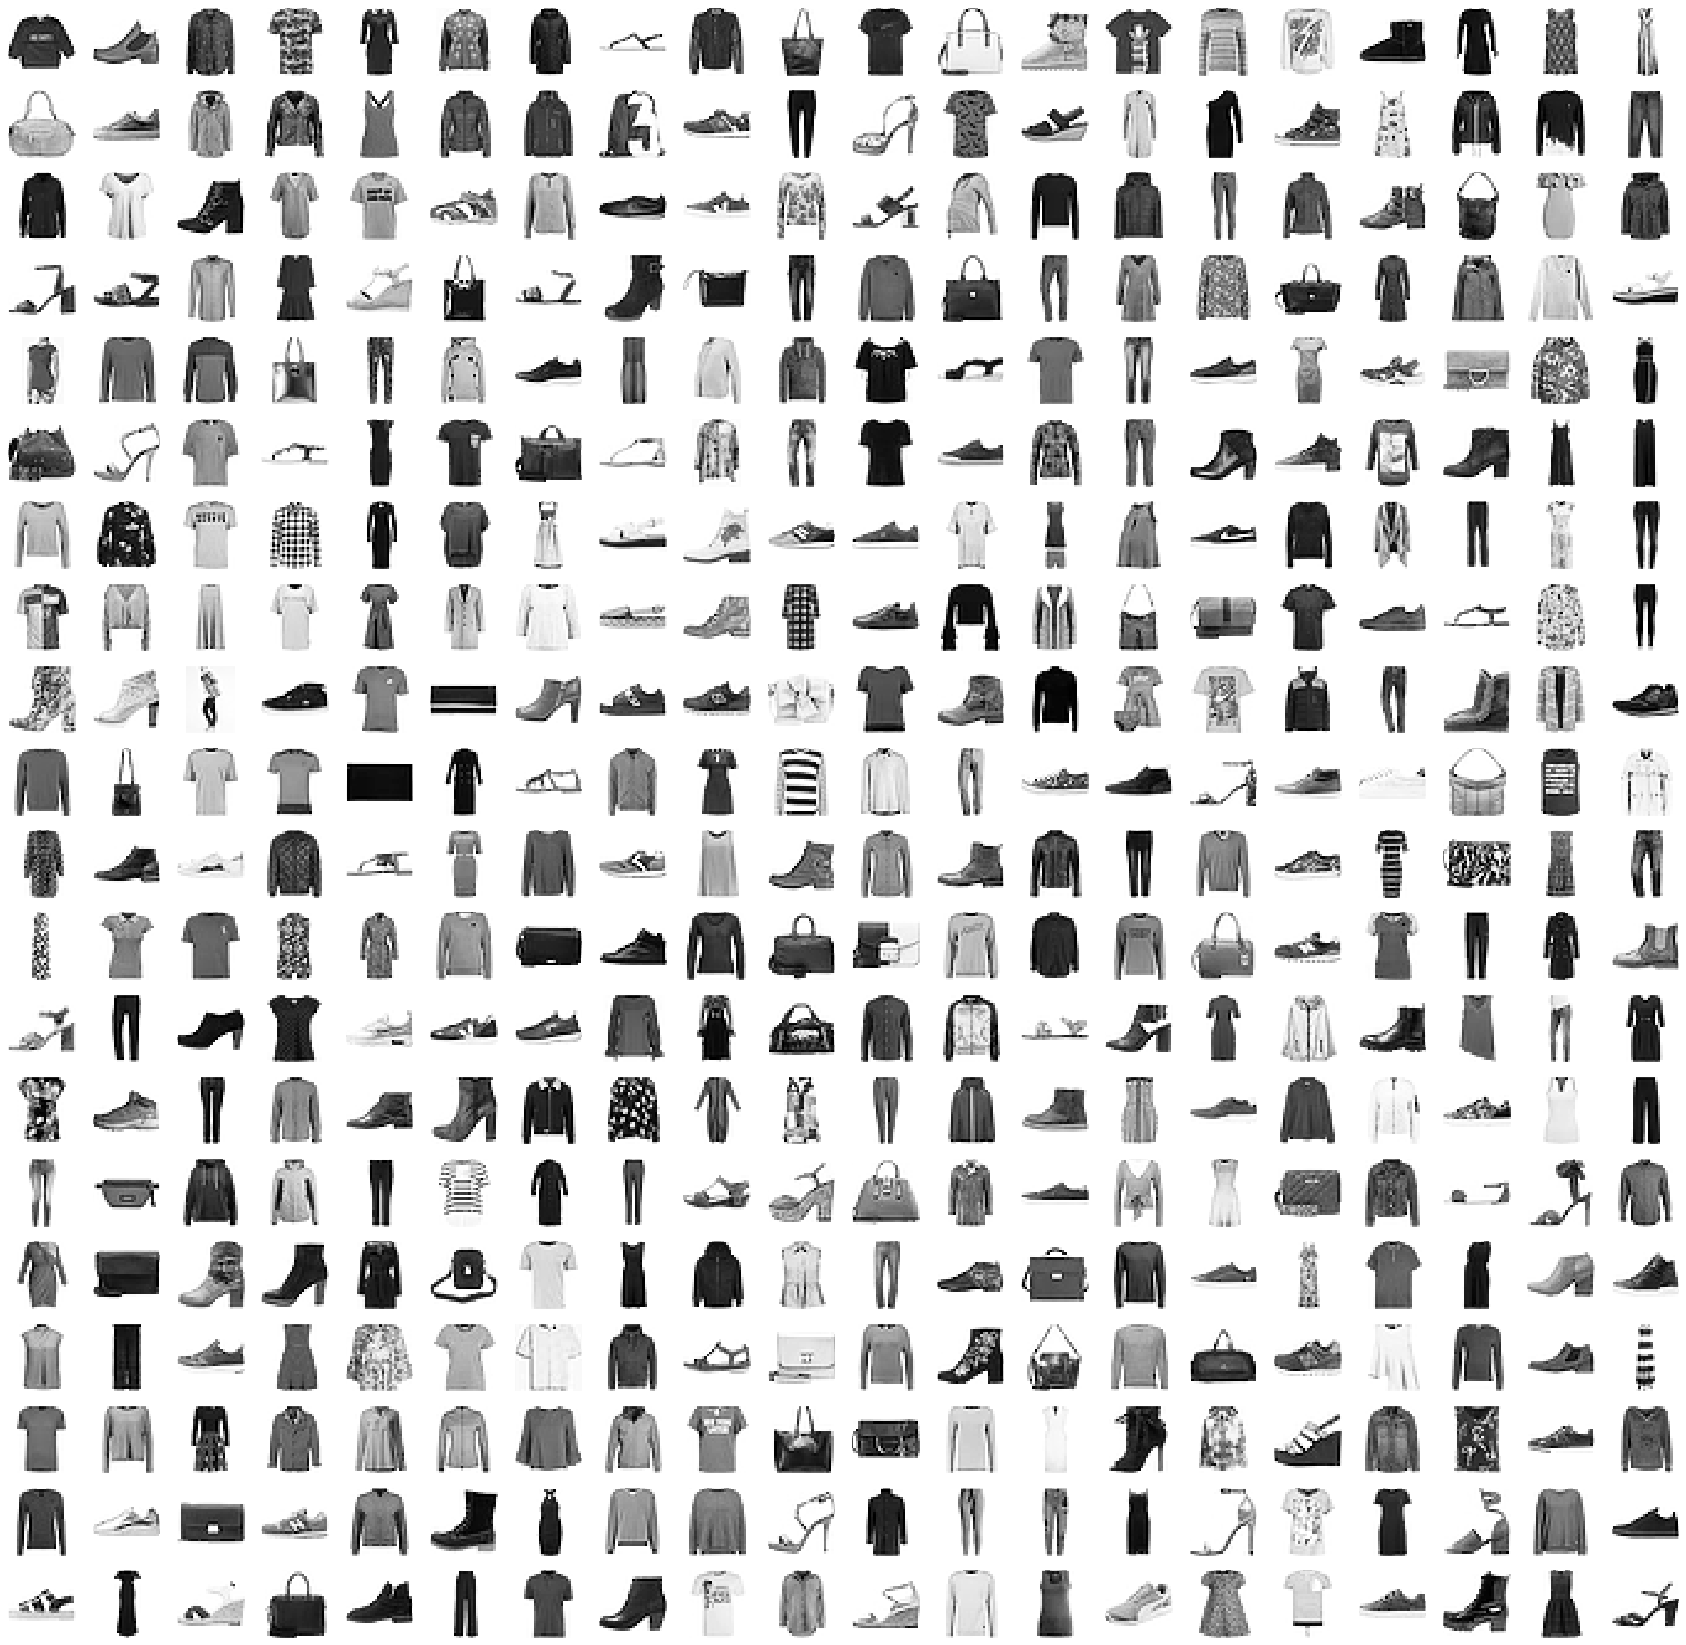

In [6]:
showNxN(np.array(xFashion.iloc[0:400,:]))

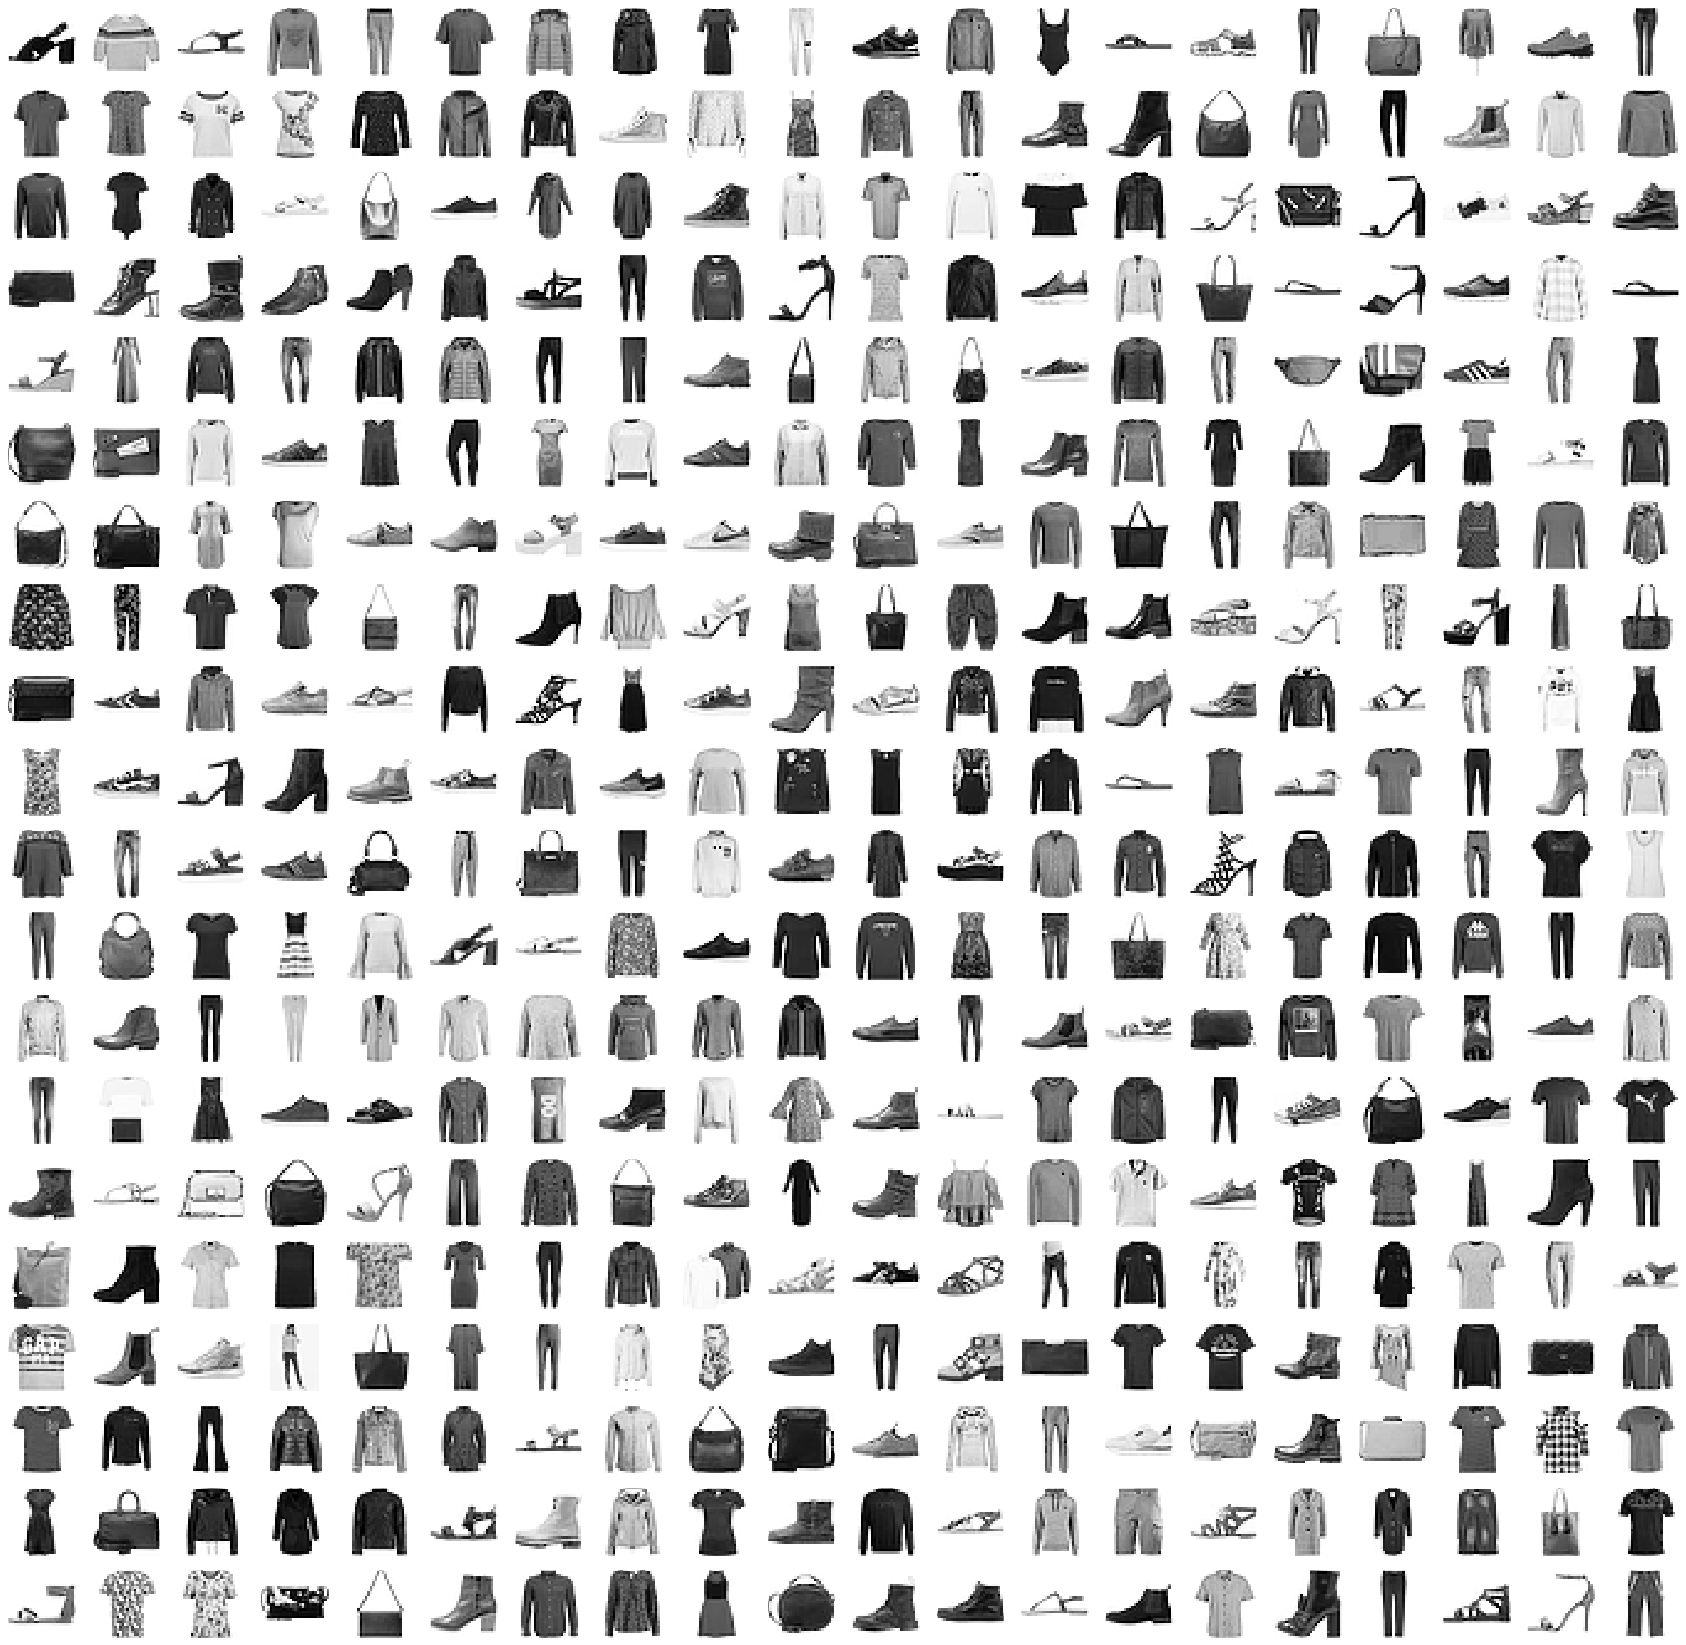

In [7]:
showNxN(np.array(xFashion.sample(400)))

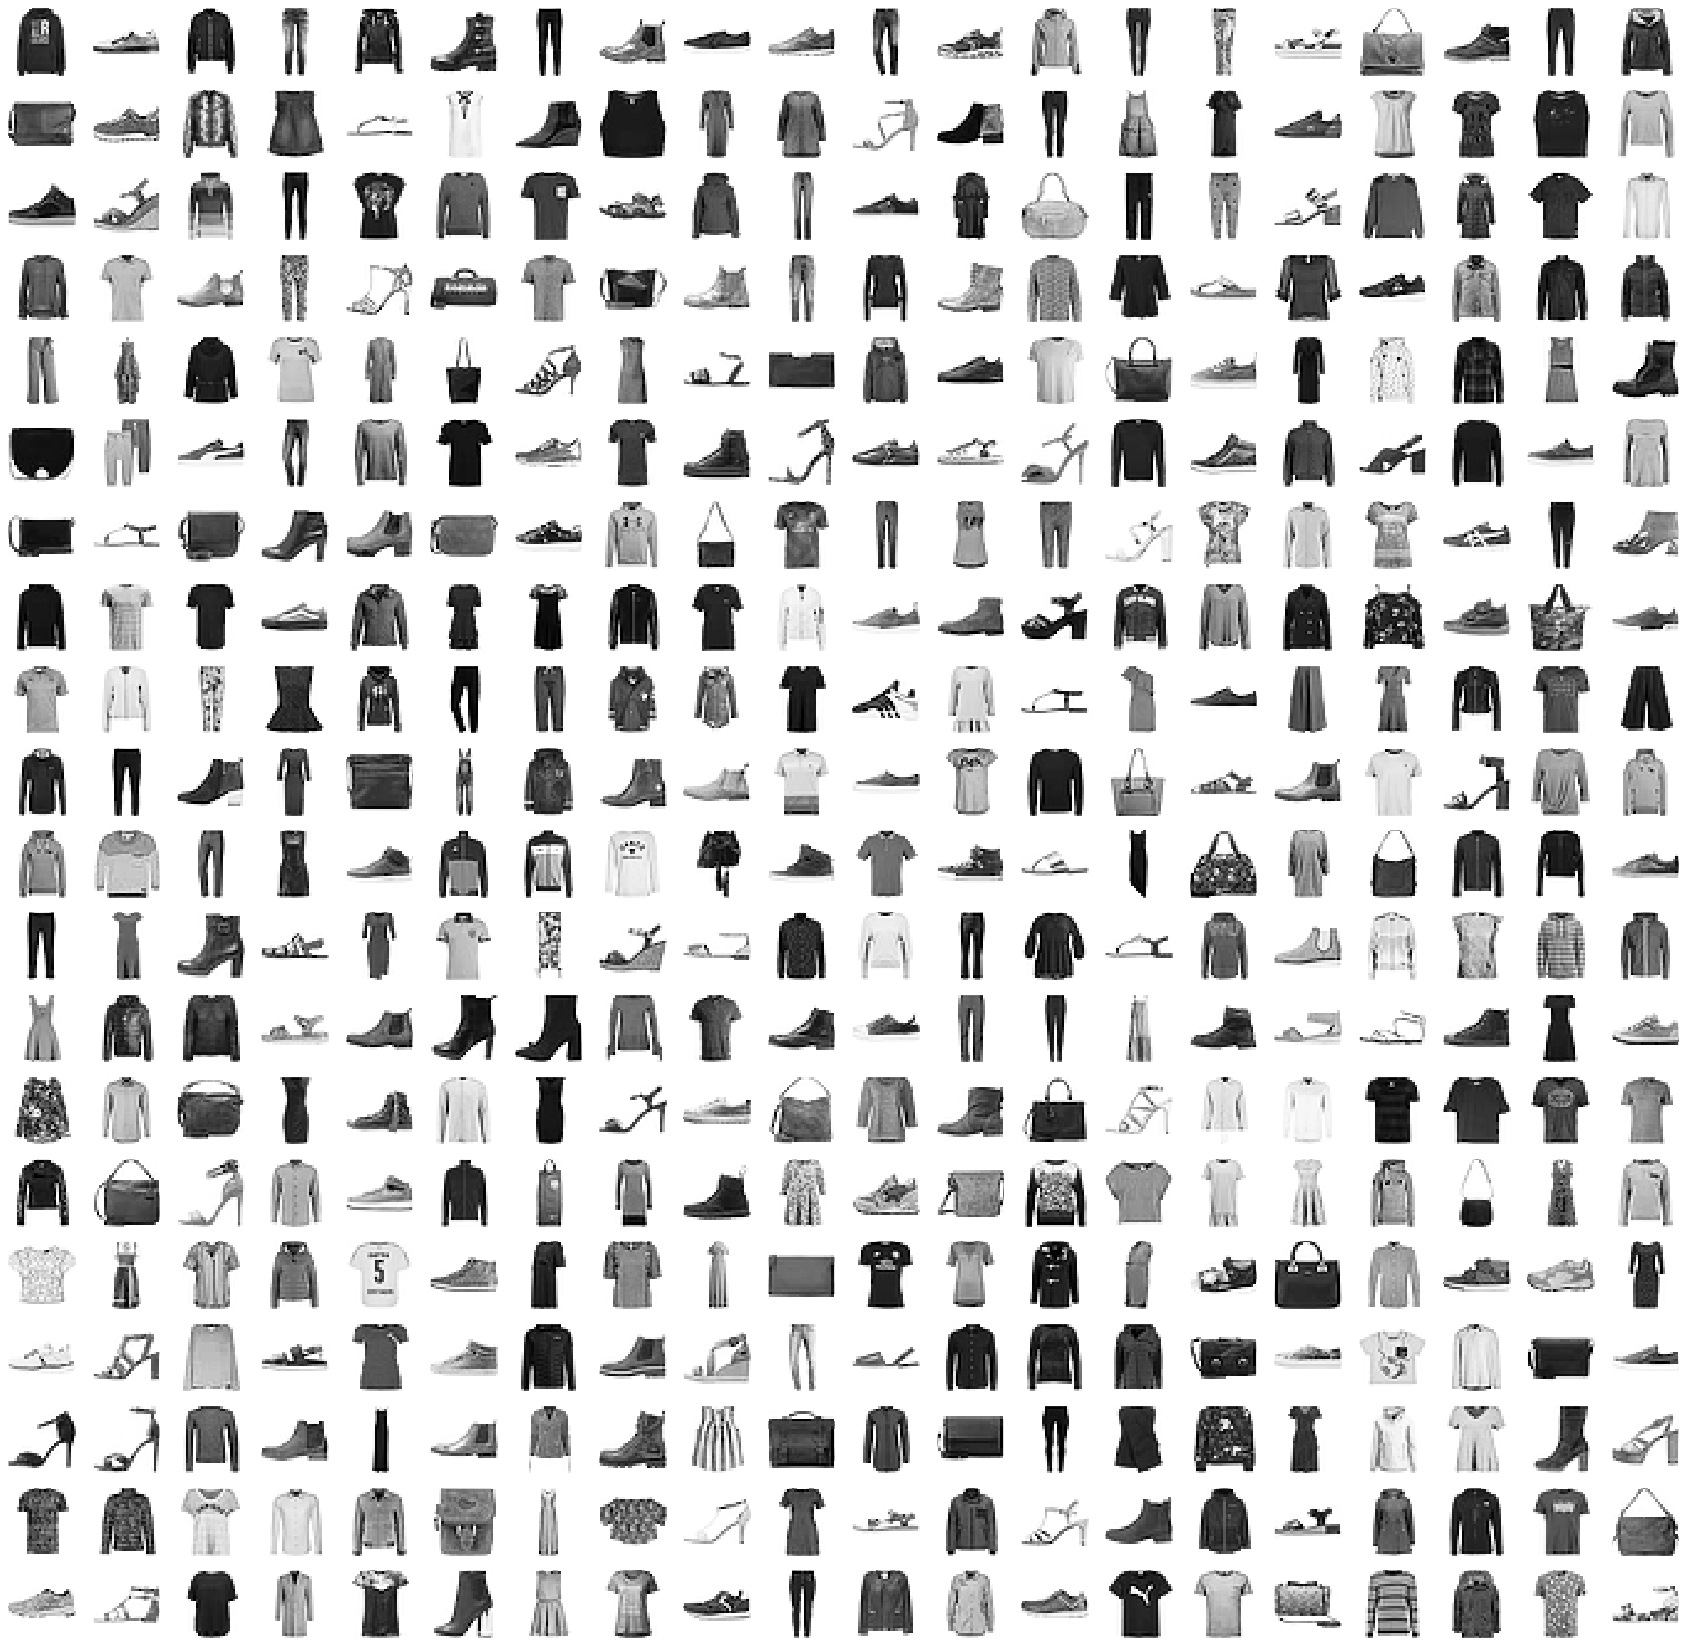

In [8]:
showNxN(np.array(xFashion.sample(400)))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    xFashion, yFashion, test_size=0.25, random_state=42)

In [10]:
logreg = LogisticRegression(C=100000, verbose=True) # C: Inverse of regularization strength; 
logreg.fit(X_train,y_train)

//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

In [11]:
from joblib import dump, load
dump("logreg", "models/mnistFashion_model1.joblib")

['models/mnistFashion_model1.joblib']

In [14]:
ytest_labels = logreg.predict(X_test)
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("Train Score for the Logit Model: {}".format(train_score))
print("Test Score for the Logit Model: {}".format(test_score))

Train Score for the Logit Model: 0.8848222222222222
Test Score for the Logit Model: 0.8426


In [21]:
y_train.groupby('label').count()

""
label
0
1
2
3
4
5
6
7
8


In [22]:
fashion_df_test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [25]:
xFash_test = pd.DataFrame(fashion_df_test.iloc[:,1:]/255)
yFash_test = pd.DataFrame(fashion_df_test.iloc[:,0])

ytest_set_labels = logreg.predict(xFash_test)
test_set_score = logreg.score(xFash_test, yFash_test)
print("Test Set Score for the Logit Model: {}".format(test_set_score))

Test Set Score for the Logit Model: 0.8415
